In [30]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import creds

In [31]:
channel_ids = ["UCz4a7agVFr1TxU-mpAP8hkw", #MohakMangal
               "UCmTM_hPCeckqN3cPWtYZZcg",#the Deshbhakt
               "UC-CSyyi47VX1lD9zyeABW3w", #DhruvRathee
               "UCeVMnSShP_Iviwkknt83cww", #Code with Harry
               "UCzwCEE_PchiBULMnAJqhGVg", #Raj Shamani
               ]
youtube = build('youtube','v3',developerKey=creds.api_key)

## Function to get channel statistics

In [32]:
def get_channel_stats(youtube,channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids))
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
               Subscribers = response['items'][i]['statistics']['subscriberCount'],
               Views = response['items'][i]['statistics']['viewCount'],
               Total_videos = response['items'][i]['statistics']['videoCount'],
               playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    return all_data

In [33]:
get_channel_stats(youtube,channel_ids)

[{'Channel_name': 'The Deshbhakt',
  'Subscribers': '6090000',
  'Views': '911056521',
  'Total_videos': '626',
  'playlist_id': 'UUmTM_hPCeckqN3cPWtYZZcg'},
 {'Channel_name': 'CodeWithHarry',
  'Subscribers': '8870000',
  'Views': '1009940401',
  'Total_videos': '2470',
  'playlist_id': 'UUeVMnSShP_Iviwkknt83cww'},
 {'Channel_name': 'Raj Shamani',
  'Subscribers': '12500000',
  'Views': '1524988013',
  'Total_videos': '1999',
  'playlist_id': 'UUzwCEE_PchiBULMnAJqhGVg'},
 {'Channel_name': 'Dhruv Rathee',
  'Subscribers': '29700000',
  'Views': '4668290155',
  'Total_videos': '700',
  'playlist_id': 'UU-CSyyi47VX1lD9zyeABW3w'},
 {'Channel_name': 'Mohak Mangal',
  'Subscribers': '4320000',
  'Views': '498987319',
  'Total_videos': '353',
  'playlist_id': 'UUz4a7agVFr1TxU-mpAP8hkw'}]

## Loading it into a dataset

In [34]:
channel_stat = get_channel_stats(youtube,channel_ids)
channel_data = pd.DataFrame(channel_stat)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,The Deshbhakt,6090000,911056521,626,UUmTM_hPCeckqN3cPWtYZZcg
1,Dhruv Rathee,29700000,4668290155,700,UU-CSyyi47VX1lD9zyeABW3w
2,Raj Shamani,12500000,1524988013,1999,UUzwCEE_PchiBULMnAJqhGVg
3,Mohak Mangal,4320000,498987319,353,UUz4a7agVFr1TxU-mpAP8hkw
4,CodeWithHarry,8870000,1009940401,2470,UUeVMnSShP_Iviwkknt83cww


In [35]:
#Converting datatypes of Subscibers, Views and Total_videos columns into integer   
channel_data=channel_data.astype({'Subscribers':'int','Views':'int','Total_videos':'int'})
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

## Visualize the no. of subsribers of each youtube channel

In [37]:
import warnings
warnings.filterwarnings("ignore")

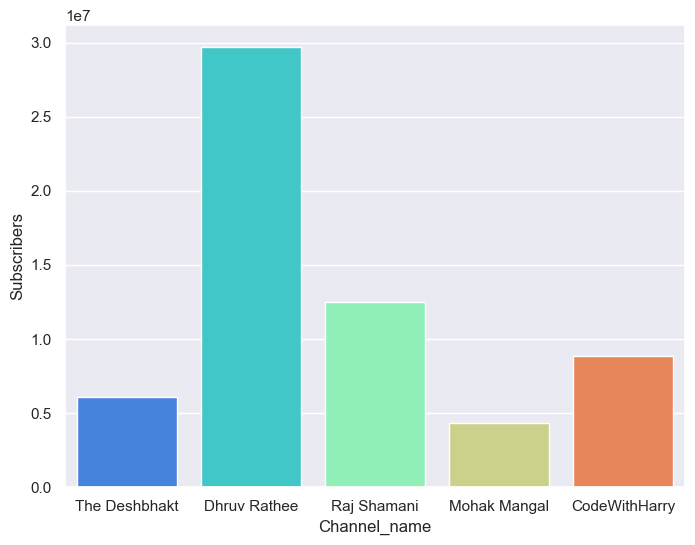

In [38]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data,palette='rainbow')

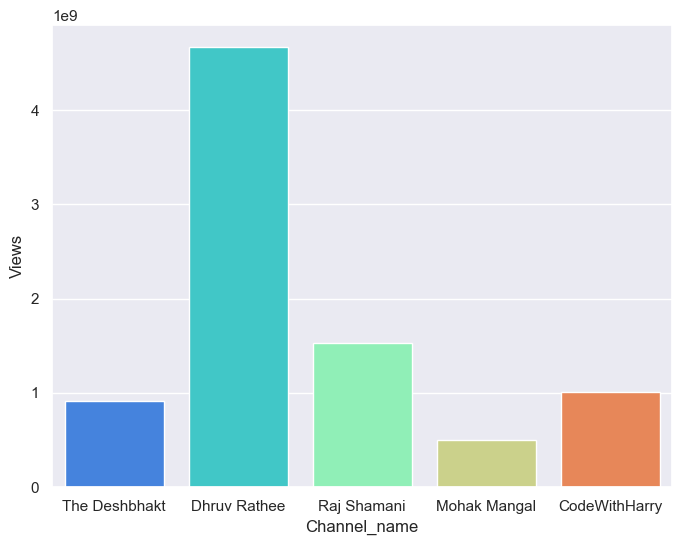

In [39]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data,palette='rainbow')

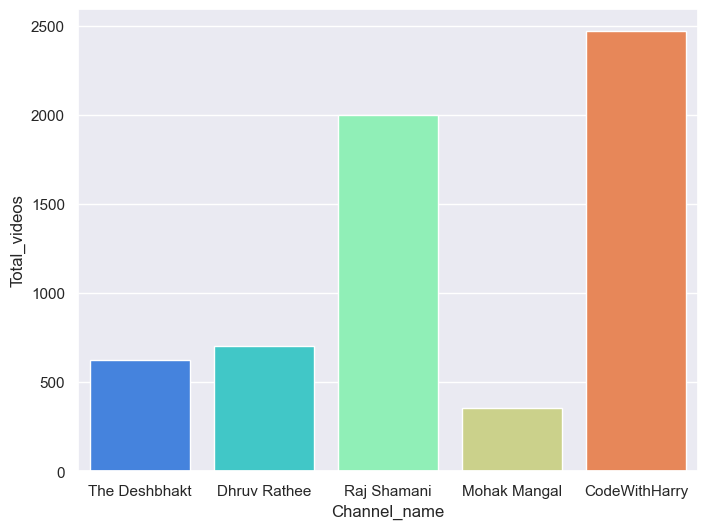

In [40]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data,palette='rainbow')

## Function to get video id 

In [41]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Mohak Mangal','playlist_id'].iloc[0]
playlist_id

'UUz4a7agVFr1TxU-mpAP8hkw'

In [42]:
def get_video_id(youtube,playlist_id):
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults=50)
    response = request.execute()
    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True 
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults=50,
                        pageToken=next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    return video_ids

In [43]:
video_ids=get_video_id(youtube,playlist_id)
video_ids

['oOkg5D8VJWA',
 'lN571ATZC-M',
 'veUu55497EA',
 'vbr0bAuwAB0',
 'LzkZviZ6Gm8',
 'U0d43eaoD-s',
 'lBVb_Ze4qwE',
 '1s1tBSkrK2M',
 'UYzbgJFc3o0',
 'RgQ20ZL-js0',
 'zrPxKLDHFiE',
 '95wUTeGHG1k',
 'AL7tCjIQNd8',
 'WFd6qsmj53w',
 'Luq_7cBEz8c',
 'CFfMA_MJ6rE',
 'N7htH7mDGxY',
 'hhdFrcCfJ0Q',
 '5VPsNBx-y4U',
 '4HcOiIeRtfs',
 '5U2w8oB-oFY',
 'PwYvpwzCsio',
 '27Pvtl557v0',
 'E8bGMg4-yKc',
 'XW7nXdacmJ8',
 'N-PI1VquHDs',
 'FkjDTRY8TYM',
 'GlF_2r2L0zM',
 'd0CR-gdAwJ8',
 '2Mzn5VGW3hY',
 'bKhg6d4OmdE',
 'bYxA__IQ3zU',
 'ZUKttmRA8zU',
 'XinLuvvAgpU',
 '8qB3zRqsYU8',
 'TZDbe_RGS_E',
 'iSazYJUk8cg',
 '91w3ORa5zD0',
 'K5IeRU0T49k',
 'rcOatmG7J6A',
 'XBAZyg_1luY',
 '8sDmgXpPS4w',
 'NN3FE813KJs',
 'Br3vVtbzUx8',
 'aNz_L1-0J0g',
 'tneuoJ8RYTM',
 'dvSvB7DZPXM',
 'Be-QX2fkb30',
 'Ga3bWycyKLo',
 'lKJz6PUNeS0',
 'SAE6CvnCwyM',
 'NvudOWSiNbM',
 'zFETRPKTR3A',
 'IaOQ6nw8RvA',
 'OiqSxdARCu4',
 'bskFcAOS7Zo',
 'NYc-I1bntmc',
 'MYNyZnBBfIM',
 'mckWsWjgKP0',
 'lHUUTboLuQ4',
 'OeAv7lv74iU',
 'Bh9aPzyFP1Q',
 'KxT0gW

## Function to get video details

In [44]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()
        for video in response['items']:
            video_stats = dict(
                Title = video['snippet']['title'],
                Published_date = video['snippet']['publishedAt'],
                Views = video['statistics'].get('viewCount', 0),
                Likes = video['statistics'].get('likeCount', 0),
                Favorites = video['statistics'].get('favoriteCount', 0),
                Comments = video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    
    return all_video_stats


In [45]:
video_details=get_video_details(youtube,video_ids)
video_data = pd.DataFrame(video_details) 
video_data = video_data.astype({'Views':'int','Likes':'int','Favorites':'int','Comments':'int'})
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data

,Title,Published_date,Views,Likes,Favorites,Comments
0,I Investigated India's Stray Dogs Problem,2025-08-30,604690,39644,0,3047
1,Why India's Censor Board is a Joke,2025-08-26,1705514,68427,0,3885
2,How Tamil Nadu Became Insanely Rich,2025-08-21,1320295,45542,0,5419
3,Can India Become Like Singapore?,2025-08-06,1140221,37169,0,2332
4,RCB Parade's Deadly Stampede | New Details Rev...,2025-08-01,832330,26023,0,2344
...,...,...,...,...,...,...
348,"Being Gay, Lesbian, Or Other Sexualities in In...",2018-08-30,695390,33398,0,3395
349,Asaram Bapu to Ram Rahim: Harsh reality of Ind...,2018-08-20,375504,18000,0,1270
350,The Dark Reality of Unemployment in India,2018-07-16,572986,37823,0,3508
351,Kisan March: Why are Indian farmers committing...,2018-06-07,69158,2884,0,230


## Display top10 videos by views

In [46]:
top_10 = video_data.sort_values(by='Views', ascending=False).head(10)
top_10

,Title,Published_date,Views,Likes,Favorites,Comments
123,What is happening in Manipur | Part 1,2023-05-08,7232478,249699,0,10490
12,Dear ANI,2025-05-25,6569285,697062,0,45899
314,Psychology of Rapists | How Rapists Think,2019-12-08,5781337,215233,0,10047
39,The Crazy Case of Rajat Dalal,2024-10-02,5731062,234876,0,10963
35,The Crazy Case of Lawrence Bishnoi,2024-10-30,5205616,125763,0,6702
29,BeerBiceps Podcast Exposed,2024-12-21,5173858,208416,0,15168
43,Pookie Maharaj Exposed,2024-08-21,4744204,192178,0,16835
40,IIT-JEE Toppers: Where Are They Now?,2024-09-25,4448410,109353,0,4558
17,Creepiest M*r**r Case of India: Dosa King,2025-03-10,4322863,100039,0,4243
69,Indian Crorepatis Crazy Life,2024-03-04,4297261,106657,0,3827


## Visualizing Top 10 videos based on Views

<Axes: xlabel='Views', ylabel='Title'>

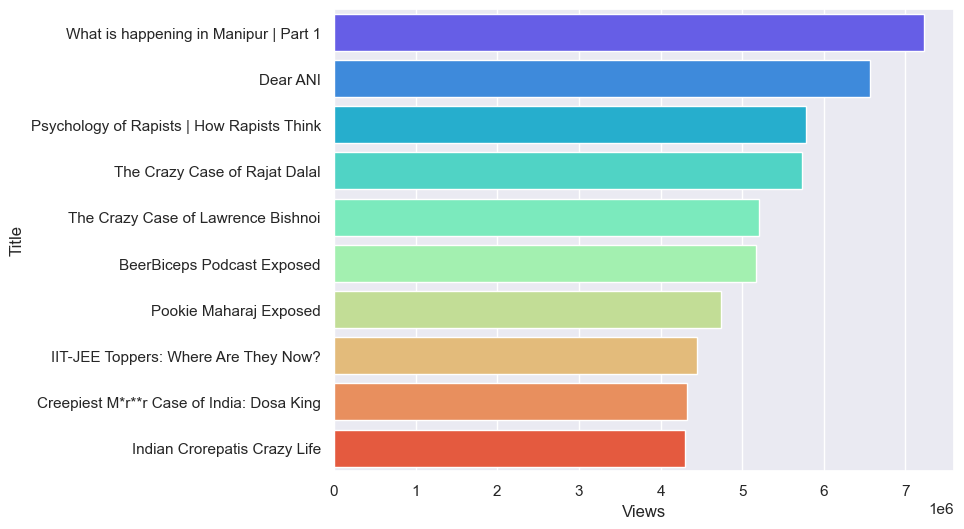

In [47]:
ax1 = sns.barplot(x='Views',y='Title',data=top_10, palette='rainbow')
ax1

 ## Analyze Average videos posted per month

In [48]:
video_data

,Title,Published_date,Views,Likes,Favorites,Comments
0,I Investigated India's Stray Dogs Problem,2025-08-30,604690,39644,0,3047
1,Why India's Censor Board is a Joke,2025-08-26,1705514,68427,0,3885
2,How Tamil Nadu Became Insanely Rich,2025-08-21,1320295,45542,0,5419
3,Can India Become Like Singapore?,2025-08-06,1140221,37169,0,2332
4,RCB Parade's Deadly Stampede | New Details Rev...,2025-08-01,832330,26023,0,2344
...,...,...,...,...,...,...
348,"Being Gay, Lesbian, Or Other Sexualities in In...",2018-08-30,695390,33398,0,3395
349,Asaram Bapu to Ram Rahim: Harsh reality of Ind...,2018-08-20,375504,18000,0,1270
350,The Dark Reality of Unemployment in India,2018-07-16,572986,37823,0,3508
351,Kisan March: Why are Indian farmers committing...,2018-06-07,69158,2884,0,230


In [49]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Favorites,Comments,Month
0,I Investigated India's Stray Dogs Problem,2025-08-30,604690,39644,0,3047,Aug
1,Why India's Censor Board is a Joke,2025-08-26,1705514,68427,0,3885,Aug
2,How Tamil Nadu Became Insanely Rich,2025-08-21,1320295,45542,0,5419,Aug
3,Can India Become Like Singapore?,2025-08-06,1140221,37169,0,2332,Aug
4,RCB Parade's Deadly Stampede | New Details Rev...,2025-08-01,832330,26023,0,2344,Aug
...,...,...,...,...,...,...,...
348,"Being Gay, Lesbian, Or Other Sexualities in In...",2018-08-30,695390,33398,0,3395,Aug
349,Asaram Bapu to Ram Rahim: Harsh reality of Ind...,2018-08-20,375504,18000,0,1270,Aug
350,The Dark Reality of Unemployment in India,2018-07-16,572986,37823,0,3508,Jul
351,Kisan March: Why are Indian farmers committing...,2018-06-07,69158,2884,0,230,Jun


In [50]:
videos_per_month = video_data.groupby('Month',as_index=False).size()
videos_per_month

,Month,size
0,Apr,27
1,Aug,30
2,Dec,30
3,Feb,29
4,Jan,30
5,Jul,35
6,Jun,31
7,Mar,27
8,May,30
9,Nov,25


In [51]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order,ordered=True)
videos_per_month=videos_per_month.sort_index() 

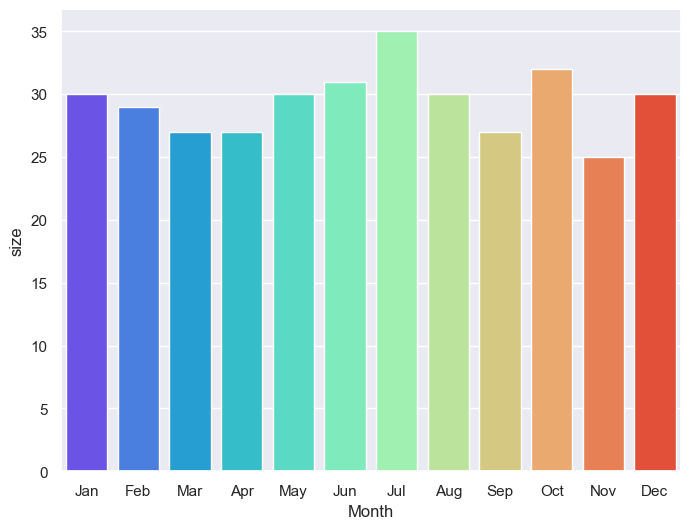

In [52]:
ax2 = sns.barplot(x='Month',y='size',data=videos_per_month,palette='rainbow')

## END!